<a href="https://colab.research.google.com/github/hanhyeonsung/ML_Assignments/blob/main/9%EC%A3%BC%EC%B0%A8_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

In [2]:
import tensorflow as tf

In [7]:
train  = pd.read_csv("train.csv", encoding = "utf-8")
test  = pd.read_csv("test.csv", encoding = "utf-8")

In [10]:
sample_submission = pd.read_csv("sample_submission.csv", encoding = "utf-8")

In [11]:
print(train.shape)
print(test.shape)
print(sample_submission.shape)

(42000, 785)
(28000, 784)
(28000, 2)


In [12]:
x = train.iloc[:, 1:].values
y = train.loc[:, "label"].values

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
print(x.shape)
print(y.shape)

x_train , x_val, y_train, y_val = train_test_split(x, y , test_size = 0.2)
print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)

(42000, 784)
(42000,)
(33600, 784)
(8400, 784)
(33600,)
(8400,)


## 1. Image 샘플 시각화

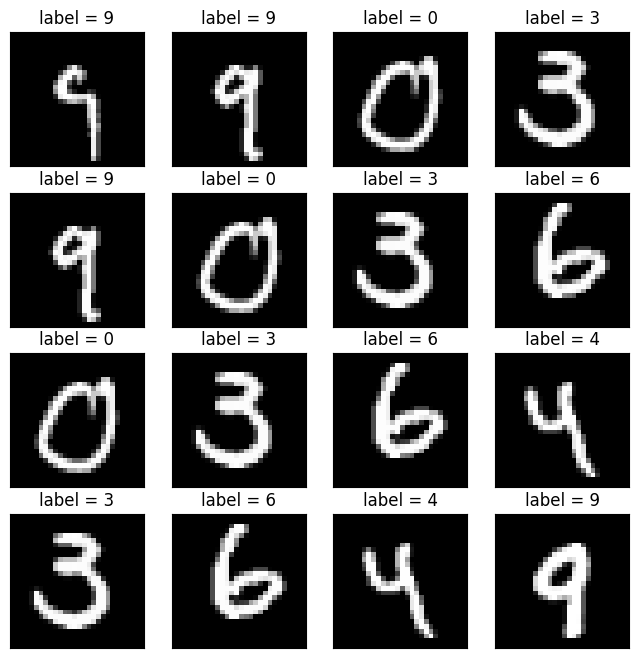

In [15]:
fig , ax = plt.subplots(4, 4 , figsize = (8,8))

for  i in range(4):
  for j in range(4):
    ax[i, j].imshow(x_train[i * 4 + j * 4].reshape(28, 28), cmap = 'gray')
    ax[i, j].set_title('label = %s' % (y_train[i * 4 + j * 4]))
    ax[i, j].set_xticks([])
    ax[i, j].set_yticks([])

## 2. Scikit-learn을 이용해 모델을 학습

In [16]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C = 1.0, class_weight=None, dual = False , fit_intercept=True,
                         intercept_scaling=1, l1_ratio = None , max_iter = 100,
                         multi_class='multinomial', n_jobs = None, penalty='l2',
                         random_state = None , solver = 'lbfgs', tol = 0.001 , verbose  = 0,
                         warm_start = False)
clf.fit(x_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial', tol=0.001)

## 3. 검증(Validation)데이터(x_val)를 prediction 하고 정확도를 평가


In [17]:
y_val_pred = clf.predict(x_val)
print("Model accuracy is %0.3f" % (accuracy_score(y_val , y_val_pred)))

Model accuracy is 0.914


In [18]:
x_val.shape

(8400, 784)

In [19]:
y_val.shape

(8400,)

## 4. 옳게 분류한 이미지를 아래 format 에 맞게 시각화

Corretly predicted images:


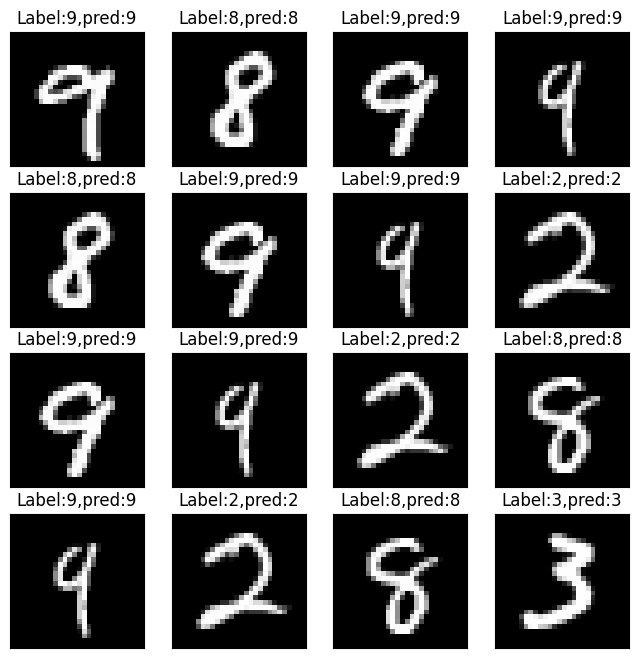

In [27]:
print("Corretly predicted images:")
x_val_correct = x_val[y_val == y_val_pred , : ]
y_val_correct = y_val[y_val == y_val_pred]
y_val_pred_correct = y_val_pred[y_val == y_val_pred]

fig , ax = plt.subplots(4, 4 , figsize = (8,8))

for  i in range(4):
  for j in range(4):
    ax[i, j].imshow(x_val_correct[i * 4 + j * 4].reshape(28, 28), cmap = 'gray')
    ax[i, j].set_title(f'Label:{y_val_correct[i * 4 + j * 4]},pred:{y_val_pred_correct[i * 4 + j * 4]}')
    ax[i, j].set_xticks([])
    ax[i, j].set_yticks([])

## 5. 잘못 분류한 이미지를 아래 format 에 맞게 시각화


In [31]:
x_val_incorrect.shape

(724, 784)

Incorretly predicted images:


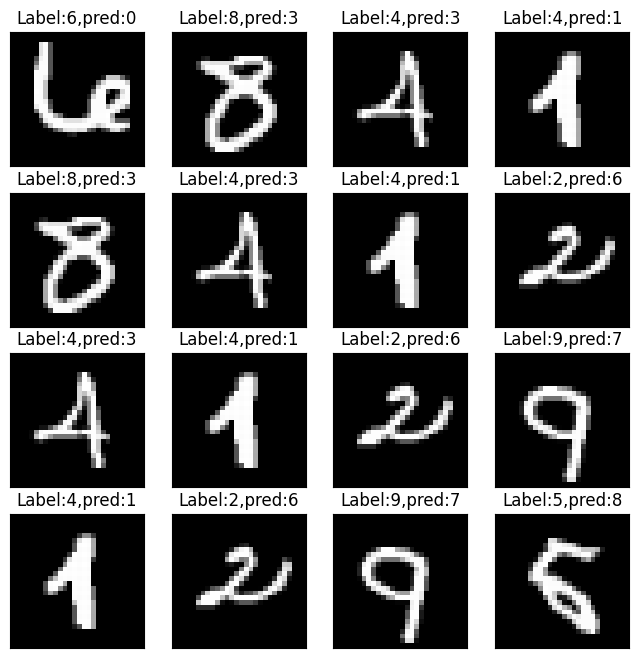

In [30]:
print("Incorretly predicted images:")
x_val_incorrect = x_val[y_val != y_val_pred , : ]
y_val_incorrect = y_val[y_val != y_val_pred]
y_val_pred_incorrect = y_val_pred[y_val != y_val_pred]

fig , ax = plt.subplots(4, 4 , figsize = (8,8))

for  i in range(4):
  for j in range(4):
    ax[i, j].imshow(x_val_incorrect[i * 4 + j * 4].reshape(28, 28), cmap = 'gray')
    ax[i, j].set_title(f'Label:{y_val_incorrect[i * 4 + j * 4]},pred:{y_val_pred_incorrect[i * 4 + j * 4]}')
    ax[i, j].set_xticks([])
    ax[i, j].set_yticks([])

## 6. 테스트 데이터(x_test)를 사용해서 예측하기


In [35]:
x_train.shape

(33600, 784)

In [37]:
test.shape

(28000, 784)

In [38]:
preds = clf.predict(test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


## 7. 예측값을 파일(sample_submission.csv)로 내보내기

In [39]:
sample_submission['Label'] = preds
sample_submission.to_csv('sample_submission.csv', index = False)

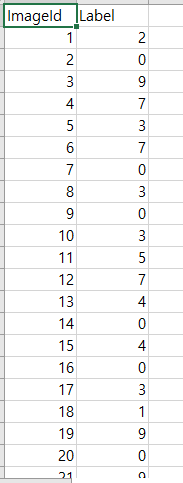